In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('../insurance.csv')
df.head()
X=df.iloc[:,:-1]
Y=df.iloc[:,-1]
X

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest
1334,18,female,31.920,0,no,northeast
1335,18,female,36.850,0,no,southeast
1336,21,female,25.800,0,no,southwest


## Scatter Plot of In-dependent variable with dependent variable

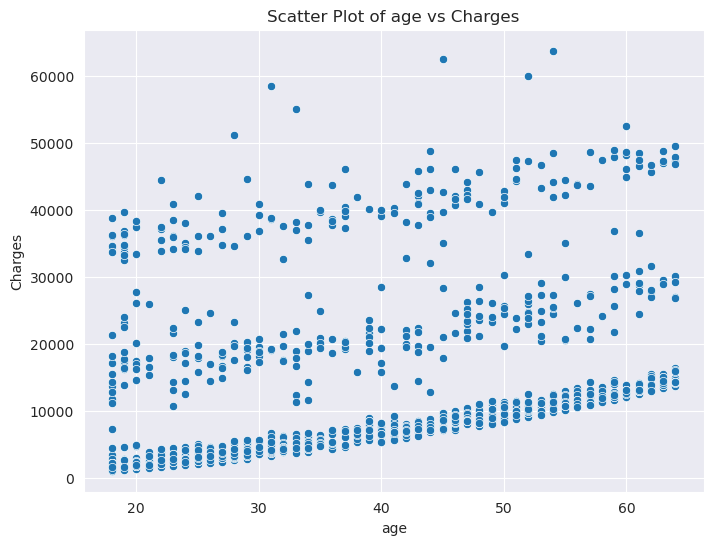

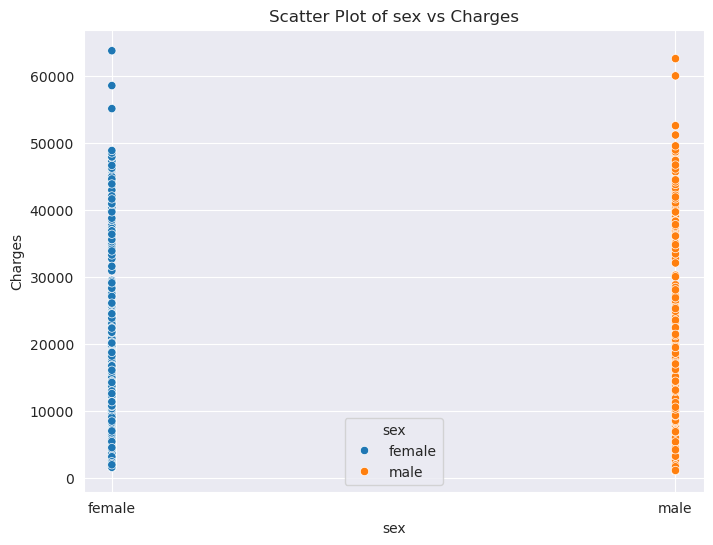

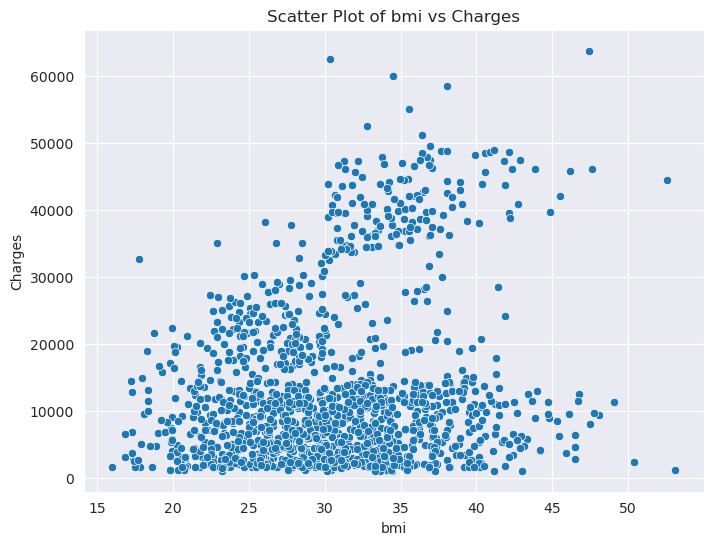

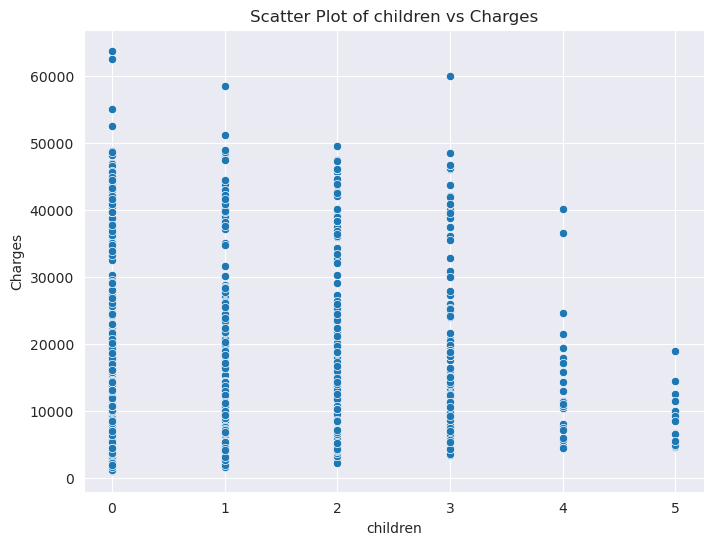

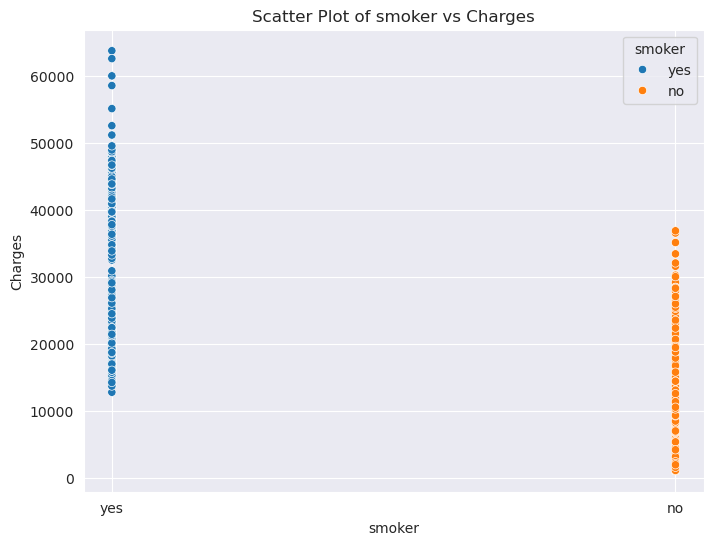

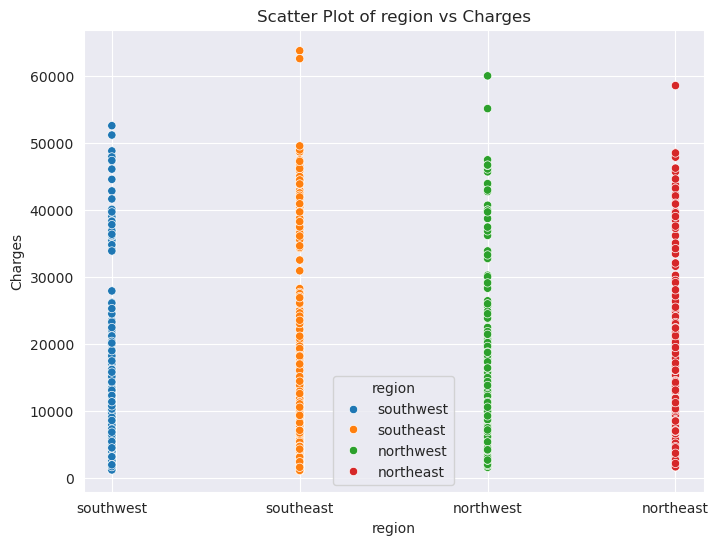

In [5]:
for var in X.columns.tolist():
    plt.figure(figsize=(8, 6))
    if X[var].dtype == 'object':  # Check if the variable is categorical
        sns.scatterplot(x=var, y=Y, data=df, hue=var)
    else:
        sns.scatterplot(x=X[var], y=Y)
    plt.title(f'Scatter Plot of {var} vs Charges')
    plt.xlabel(var)
    plt.ylabel('Charges')
    plt.show()

In [35]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 1] = label_encoder.fit_transform(X.iloc[:, 1])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,yes,southwest
1,18,1,33.770,1,no,southeast
2,28,1,33.000,3,no,southeast
3,33,1,22.705,0,no,northwest
4,32,1,28.880,0,no,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest
1334,18,0,31.920,0,no,northeast
1335,18,0,36.850,0,no,southeast
1336,21,0,25.800,0,no,southwest


In [36]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 4] = label_encoder.fit_transform(X.iloc[:, 4])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,southwest
1,18,1,33.770,1,0,southeast
2,28,1,33.000,3,0,southeast
3,33,1,22.705,0,0,northwest
4,32,1,28.880,0,0,northwest
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest
1334,18,0,31.920,0,0,northeast
1335,18,0,36.850,0,0,southeast
1336,21,0,25.800,0,0,southwest


In [37]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X.iloc[:, 5] = label_encoder.fit_transform(X.iloc[:, 5])
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#Argument should be categorial data feild


# Country column
# Assuming X is your dataset
# Define the ColumnTransformer with OneHotEncoder for the first column (index 0)
ct = ColumnTransformer(
    transformers=[
        ('Country', OneHotEncoder(drop='first'), [5])
    ], remainder='passthrough'
)

# Fit and transform the dataset
X = np.array(ct.fit_transform(X))
X

array([[0.0, 0.0, 1.0, ..., 27.9, 0, 1],
       [0.0, 1.0, 0.0, ..., 33.77, 1, 0],
       [0.0, 1.0, 0.0, ..., 33.0, 3, 0],
       ...,
       [0.0, 1.0, 0.0, ..., 36.85, 0, 0],
       [0.0, 0.0, 1.0, ..., 25.8, 0, 0],
       [1.0, 0.0, 0.0, ..., 29.07, 0, 1]], dtype=object)

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [40]:
from sklearn.linear_model import LinearRegression
regresor=LinearRegression()
regresor.fit(X_train,Y_train)
Y_pred=regresor.predict(X_test)

In [41]:
print(Y_test.shape, Y_pred.shape)


(268,) (268,)


# Accuracy Check

In [42]:
from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)

0.7999876970680436


# Backward Elimination

In [43]:
import statsmodels.api as sm

# adding X_0=1 for b_0 therefore we will add X_0 in X
X_train = np.array(X_train, dtype=float)
Y_train = np.array(Y_train, dtype=float)

# X=np.append(arr=np.ones((50,1)).astype(int),values=X,axis=1)
# # X

# Backward Elimination
X_train = np.append(arr=np.ones((X_train.shape[0], 1)).astype(int), values=X_train, axis=1)  # Adding the intercept term

In [44]:


# # X_opt will contain only variables that are significant
X_opt = X_train[:, [0, 1, 2, 3, 4, 5,6,7,8]]
# X_opt = X[:, list(range(X.shape[1]))]

# Fit the model will all possible predictor
regressor_ols = sm.OLS(endog=Y_train, exog=X_opt).fit()
regressor_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     371.7
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          1.85e-301
Time:                        12:09:55   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1061   BIC:                         2.177e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1127.759    -10.488      0.000    -1.4e+04   -9615.183
x1          -260.1327    550.305     -0.473      0.637   -1339.943     819.678
x2          -913.2788    549.905     -1.661      0.097   -1992.304     165.747
x3          -761.9487    543.309     -1.402      0.161   -1828.031     304.134
x4           253.7005     13.530     18.751      0.000     227.152     280.249
x5           -15.4637    378.193     -0.041      0.967    -757.555     726.627
x6           335.9628     32.228     10.424      0.000     272.724     399.201
x7           436.9101    156.584      2.790      0.005     129.661     744.159
x8          2.361e+04    470.606     50.159      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      256.825   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.044
Skew:                           1.279   Prob(JB):                    2.29e-135
Kurtosis:                       5.715   Cond. No.                         314.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:

X_opt=X_train[:,[0,1,2,3,4,6,7,8]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y_train,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     425.2
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          8.67e-303
Time:                        12:10:02   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1062   BIC:                         2.176e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.183e+04   1115.866    -10.606      0.000    -1.4e+04   -9645.051
x1          -259.8780    550.011     -0.472      0.637   -1339.110     819.354
x2          -913.5870    549.595     -1.662      0.097   -1992.003     164.829
x3          -761.7475    543.031     -1.403      0.161   -1827.284     303.789
x4           253.7129     13.520     18.765      0.000     227.183     280.242
x5           335.9233     32.199     10.433      0.000     272.743     399.104
x6           436.7285    156.447      2.792      0.005     129.748     743.710
x7           2.36e+04    469.846     50.238      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      256.860   Durbin-Watson:                   1.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.253
Skew:                           1.279   Prob(JB):                    2.06e-135
Kurtosis:                       5.715   Cond. No.                         311.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:

X_opt=X_train[:,[0,2,3,4,6,7,8]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y_train,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     496.4
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          4.17e-304
Time:                        12:10:04   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.198e+04   1073.174    -11.162      0.000   -1.41e+04   -9872.616
x1          -783.3806    475.342     -1.648      0.100   -1716.096     149.334
x2          -630.4111    466.327     -1.352      0.177   -1545.437     284.614
x3           253.8810     13.511     18.791      0.000     227.370     280.392
x4           336.1082     32.185     10.443      0.000     272.956     399.261
x5           436.3103    156.388      2.790      0.005     129.447     743.174
x6          2.361e+04    469.557     50.279      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      256.390   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              617.444
Skew:                           1.278   Prob(JB):                    8.39e-135
Kurtosis:                       5.706   Cond. No.                         293.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:

X_opt=X_train[:,[0,2,4,6,7,8]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y_train,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.737
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     594.8
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          4.05e-305
Time:                        12:10:05   Log-Likelihood:                -10852.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1064   BIC:                         2.175e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04   1070.024    -11.305      0.000   -1.42e+04   -9996.974
x1          -548.6738    442.673     -1.239      0.215   -1417.285     319.937
x2           254.4110     13.510     18.831      0.000     227.901     280.921
x3           332.2267     32.069     10.360      0.000     269.301     395.152
x4           423.5793    156.165      2.712      0.007     117.154     730.005
x5          2.363e+04    469.372     50.353      0.000    2.27e+04    2.46e+04
==============================================================================
Omnibus:                      258.860   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              626.995
Skew:                           1.287   Prob(JB):                    7.07e-137
Kurtosis:                       5.727   Cond. No.                         292.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [48]:

X_opt=X_train[:,[0,4,6,7,8]]

# Fit the model will all possible predictor
regressor_ols=sm.OLS(endog=Y_train,exog=X_opt).fit()
regressor_ols.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.736
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     742.8
Date:                Fri, 19 Jul 2024   Prob (F-statistic):          3.00e-306
Time:                        12:10:06   Log-Likelihood:                -10853.
No. Observations:                1070   AIC:                         2.172e+04
Df Residuals:                    1065   BIC:                         2.174e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.191e+04   1059.711    -11.239      0.000    -1.4e+04   -9831.179
x1           254.9715     13.506     18.878      0.000     228.470     281.473
x2           320.6190     30.679     10.451      0.000     260.422     380.816
x3           430.5457    156.103      2.758      0.006     124.242     736.849
x4          2.359e+04    467.981     50.403      0.000    2.27e+04    2.45e+04
==============================================================================
Omnibus:                      257.442   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              620.986
Skew:                           1.282   Prob(JB):                    1.43e-135
Kurtosis:                       5.712   Cond. No.                         289.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
from sklearn.linear_model import LinearRegression
regresor2=LinearRegression()
regresor2.fit(X_opt,Y_train)
X_test = np.append(arr=np.ones((X_test.shape[0], 1)).astype(int), values=X_test, axis=1)  # Adding the intercept term

Y_pred=regresor2.predict(X_test[:,[0,4,6,7,8]])

from sklearn.metrics import r2_score
r2=r2_score(Y_test,Y_pred)
print(r2)

0.7978274606303822
